## Regression models

Regression models are a type of supervised models that predict a continuous output variable, known as the dependent or target variable, based on one or more input variables, known as independent or predictor variables. The goal of regression is to find the relationship or mapping between the input(s) and the output, and use it to make predictions for new input data.

In this module we will start from the most common types of regression models: linear and polynomial. As we increase the complexity of the model (number of parameters), we also increase the risk of overfitting the training data. We will check for overfitting using learning curves and then show which  regularization techniques can reduce overfitting: Ridge, Lasso and ElasticNet. Finally we will explore the use for RandomForest models for regression problems.

**3.1 Load libraries and data**

In this module we will continue using the large_rivers dataset that was introduced in Module 1. Please, refer to that if your need more details explanations on the data. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Read dataframe from xlsx file
file_url = 'https://github.com/DHI/Intro_ML_course/raw/main/module_1/large_rivers_processed.csv'
df = pd.read_csv(file_url)

# If you are unable to read the file from the url, you can download it and read it locally
# file_path = 'large_rivers_processed.csv'
# df = pd.read_csv(file_path)

**3.2 Linear regression**

Let's start from a univariate problem, where we predict the Discharge given the catchmet Area. We expect a log-transformation to increase the performance of the model as it will reduce the impact of outliers, by compressing the range of the values. This will also facilitate the visualization of the results.

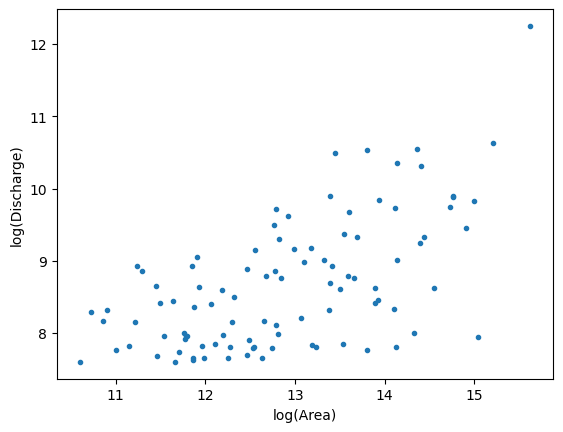

In [3]:
# Define target variable y
y = df['Discharge']

# Select input features X (only Area)
X = df[['Area']]

# Apply log transformation to both X and y
X = np.log(X)
y = np.log(y)

# Plot log transformed data
plt.scatter(X, y, marker='.')
plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.show()

In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state is an arbitrary number (e.g., 42) ensuring reproducibility.

# Print shape of all subsets
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (78, 1)
Shape of y_train:  (78,)
Shape of X_test:  (20, 1)
Shape of y_test:  (20,)


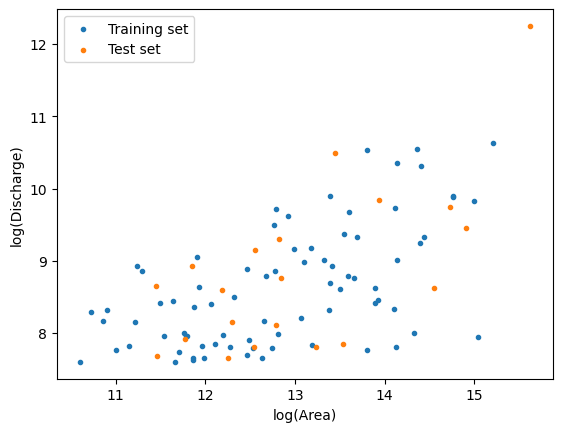

In [5]:
# Plot training and test sets in the same scatter plot
plt.scatter(X_train, y_train, marker='.', label='Training set')
plt.scatter(X_test, y_test, marker='.', label='Test set')
plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.legend()
plt.show()

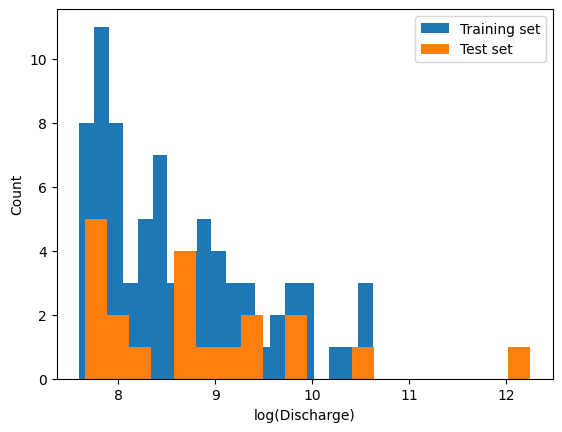

In [6]:
# Compare histograms of training and test sets
plt.hist(y_train, bins=20, label='Training set')
plt.hist(y_test, bins=20, label='Test set')
plt.xlabel('log(Discharge)')
plt.ylabel('Count')
plt.legend()
plt.show()

We start by fitting a linear model (straight line) to the data. For this univariate problem, the model coefficients will be equivalent to intercept and slope of the fitted line.

In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Slope: [0.41218567]
Intercept: 3.334660208119308


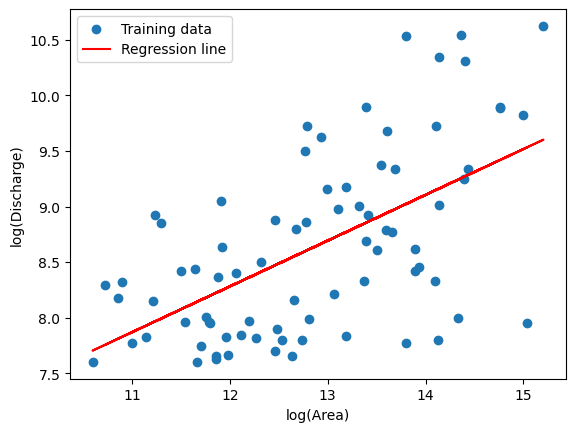

In [8]:
# Inspect and visualized the parameters of the trained model
slope = model.coef_
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plot scatter of x_train vs y_train and regression line
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_train, slope*X_train + intercept, color='red', label='Regression line')
plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.legend()

Next, we need to evaluate the predictions on a independent test set. We can do this by using the predict method of the model object.

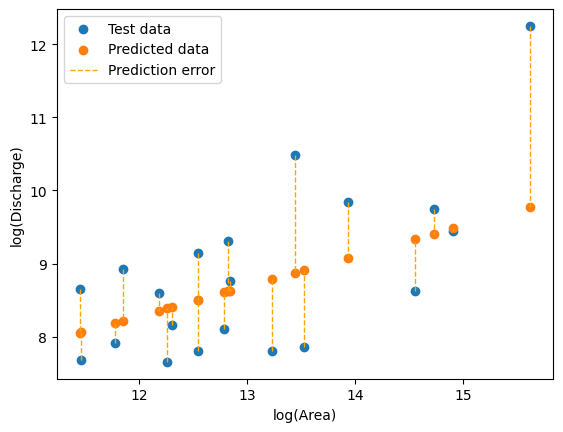

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(X_test, y_test, label='Test data')
plt.scatter(X_test, y_pred, label='Predicted data')
# Add vertical lines connecting points to regression line
for i in range(len(X_test)):
    plt.plot([X_test.iloc[i,0], X_test.iloc[i,0]], [y_test.iloc[i],y_pred[i]], color='orange', linestyle='--', linewidth=1)

plt.plot([], [], color='orange', linestyle='--', linewidth=1, label='Prediction error') # Add entry legend

plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.legend()
plt.show()

**Exercise 1**


Reverse the log-transform of the model predictions and compute the prediction error for the test data as RMSE in the original measuring unit (m3/s). Which other error metric can be relevant? See pre-defined metrics in sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [10]:
# # Solution 1
# y_pred = np.exp(y_pred)
# y_test = np.exp(y_test)

# mse = mean_squared_error(y_test,y_pred)

# # Plot scatter of regression line, x_test vs y_test and y_pred
# plt.scatter(X_test, y_test, label='Test data')
# plt.scatter(X_test, y_pred, label='Predicted data')
# # Add vertical lines connecting points to regression line
# for i in range(len(X_test)):
#     plt.plot([X_test.iloc[i,0], X_test.iloc[i,0]], [y_test.iloc[i],y_pred[i]], color='orange', linestyle='--', linewidth=1)

# plt.plot([], [], color='orange', linestyle='--', linewidth=1, label='Prediction error') # Add entry legend

# plt.xlabel('Area')
# plt.ylabel('Discharge')
# plt.legend()
# plt.show()
# print(np.sqrt(mse)) #43445 m3/s

**3.3 Polynomial regression**

Polynomial transformations of the input features allow to use a linear model to fit nonlinear data. All we need to do is adding powers of each feature as new features, and train a linear model on this extended set of features. The degree of the polynomial is the higher power we use in the transformation and therefore determines the number of parameters (degree of) in the model.

In [11]:
# Initialize polynomial features object
poly = PolynomialFeatures(degree=2)

# Transform X_train and X_test
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

#Compare first instance in original and transformed X_train
print('Original: ', X_train.iloc[0,:])
print('Transformed: ', X_train_poly[0,:])

Original:  Area    13.928977
Name: 49, dtype: float64
Transformed:  [  1.          13.92897673 194.01639285]


MSE:  0.6717001927970422


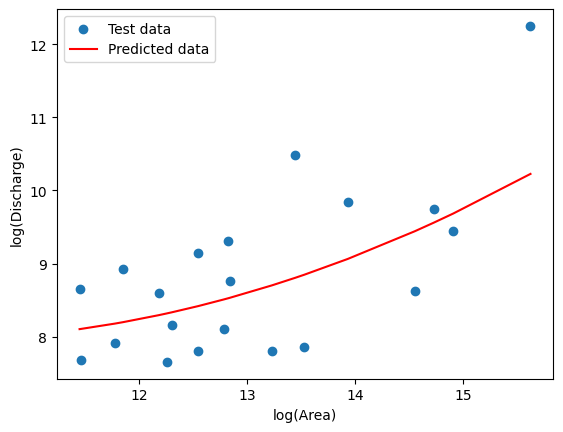

In [12]:
# Fit linear model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = model_poly.predict(X_test_poly)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred_poly)
print('MSE: ', mse)

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(X_test, y_test, label='Test data')

# Sort X_test and y_pred by X_test
idx = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values[idx]
y_pred_poly_sorted = y_pred_poly[idx]

plt.plot(X_test_sorted, y_pred_poly_sorted, color='red', label='Predicted data')
plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.legend()
plt.show()


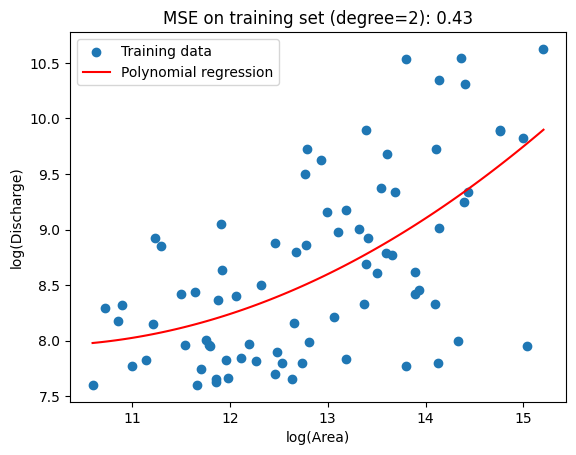

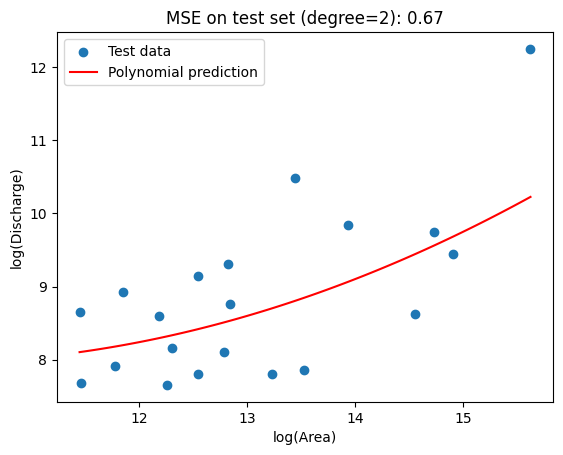

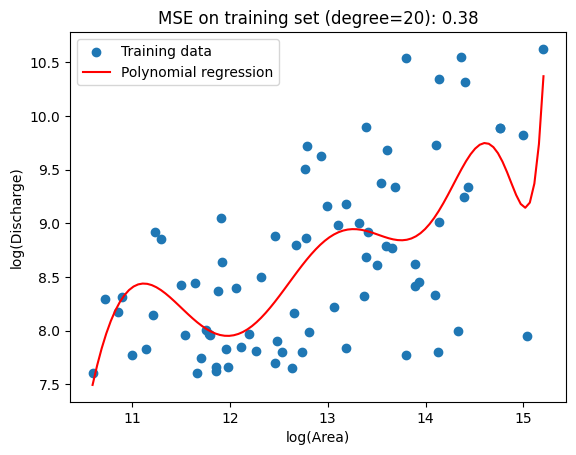

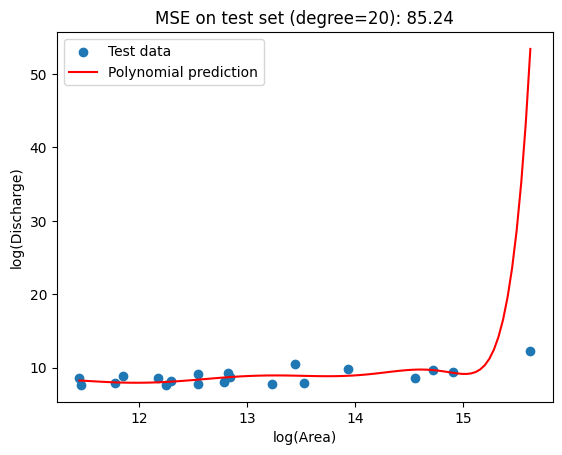

In [13]:
# Define function to plot polynomial regression with different degrees

def polynomial_regression(degree):
    # Initialize polynomial features object
    poly = PolynomialFeatures(degree=degree)

    # Transform X_train and X_test
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # Fit linear model on the polynomial features
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # Make predictions on the training set
    y_pred_poly_train = model_poly.predict(X_train_poly)

    # Compute the mean squared error of the model
    mse_train = mean_squared_error(y_train, y_pred_poly_train)

    # Plot scatter of regression line, x_test vs y_test and y_pred
    plt.scatter(X_train, y_train, label='Training data')
    
    # Plot polynomial line
    x_range = np.linspace(X_train.min(), X_train.max(), 100)
    x_range_poly = poly.fit_transform(x_range.reshape(-1, 1))
    y_range_poly = model_poly.predict(x_range_poly)
    plt.plot(x_range, y_range_poly, color='red', label='Polynomial regression')
    
    plt.xlabel('log(Area)')
    plt.ylabel('log(Discharge)')
    # Plot MSe in title
    plt.title(f'MSE on training set (degree={degree}): {mse_train:.2f}')
    plt.legend()
    plt.show()

    # Make predictions on the test set
    y_pred_poly_test = model_poly.predict(X_test_poly)

    # Compute the mean squared error of the model
    mse_test = mean_squared_error(y_test, y_pred_poly_test)

    # Plot scatter of regression line, x_test vs y_test and y_pred
    plt.scatter(X_test, y_test, label='Test data')
    
    # Plot polynomial line
    x_range = np.linspace(X_test.min(), X_test.max(), 100)
    x_range_poly = poly.fit_transform(x_range.reshape(-1, 1))
    y_range_poly = model_poly.predict(x_range_poly)
    plt.plot(x_range, y_range_poly, color='red', label='Polynomial prediction')
    
    plt.xlabel('log(Area)')
    plt.ylabel('log(Discharge)')
    # Plot MSe in title
    plt.title(f'MSE on test set (degree={degree}): {mse_test:.2f}')
    plt.legend()
    plt.show()

    return None

# Call function for different degrees
polynomial_regression(2)
polynomial_regression(20)

**3.4 Bias/variance tradeoff**

The bias-variance tradeoff is a fundamental concept in machine learning and statistics that describes the tradeoff between two sources of error that affect the performance of a predictive model:
* **Bias** refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias means that the model is too simplistic and can't capture the underlying patterns in the data, leading to systematic errors regardless of the dataset used for training. This is also known as underfitting.

* **Variance** refers to the model's sensitivity to small changes in the training data. High variance means the model is highly flexible and fits the training data very closely, including the noise. As a result, it may perform poorly on new, unseen data because it's too tailored to the training set. This is known as overfitting.

Ideally, we would want a model with low bias and low variance, but in practice, there is a **tradeoff**. As we increase model complexity (e.g., more parameters), variance increases and bias decreases. Conversely, as we decrease model complexity, bias increases and variance decreases. The goal is to find the sweet spot where the total error is minimized, which usually involves balancing a moderate amount of bias and variance.


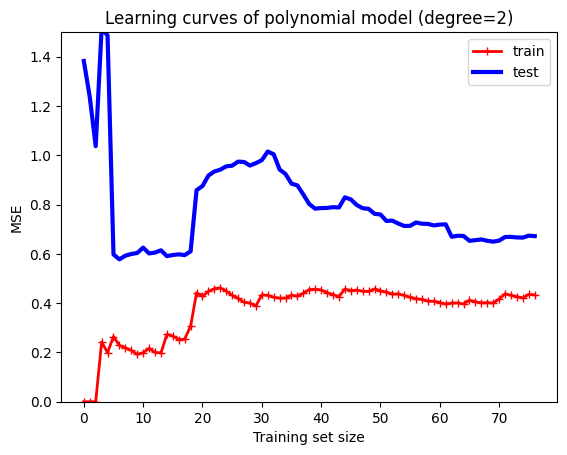

Test MSE mean :  0.792546824942856
Train MSE mean :  0.3710007969913168


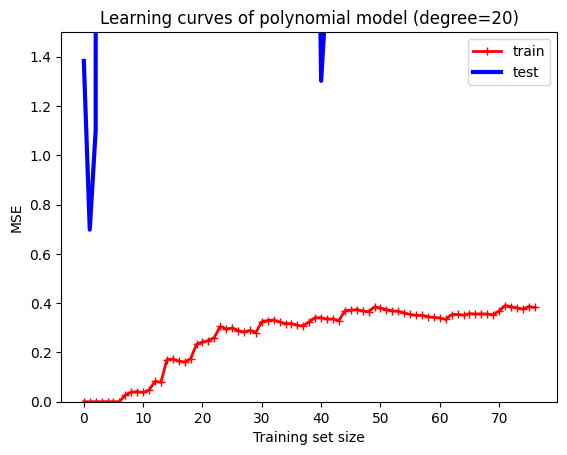

Test MSE mean :  105957.76345657883
Train MSE mean :  0.27012763719772054


In [14]:
def plot_learning_curves(degree, X, y):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train_poly)):
        model.fit(X_train_poly[:m], y_train[:m])
        y_train_predict = model.predict(X_train_poly[:m])
        y_test_predict = model.predict(X_test_poly)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=3, label="test")
    plt.ylim(0,1.5)
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('MSE')
    plt.title(f'Learning curves of polynomial model (degree={degree})')
    plt.show()
    print('Test MSE mean : ',np.mean(test_errors))
    print('Train MSE mean : ',np.mean(train_errors))

plot_learning_curves(2, X, y)
plot_learning_curves(20, X, y)

**Exercise 2**

Which polynomial degree offers the best tradeoff between the bias and variance?

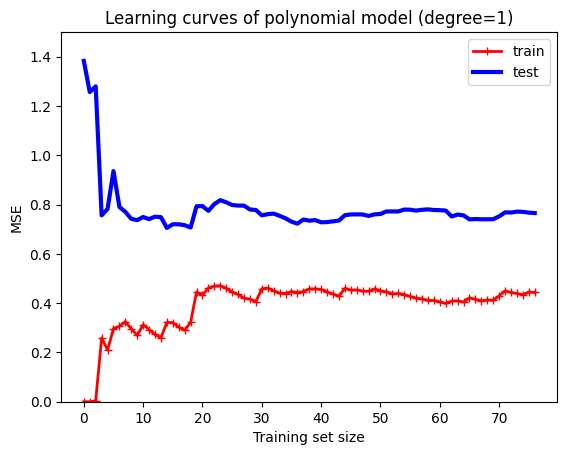

Test MSE mean :  0.7830315430512806
Train MSE mean :  0.38954383473717524


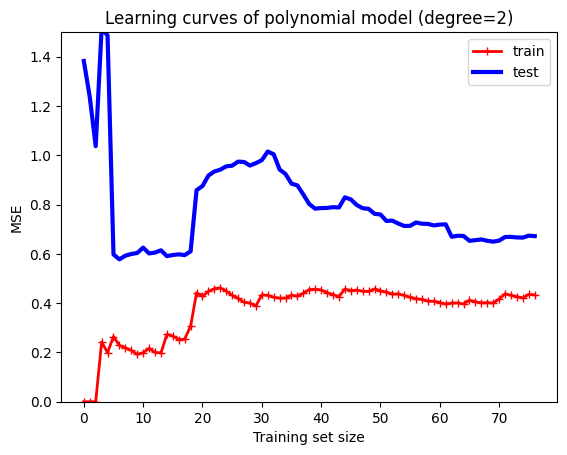

Test MSE mean :  0.792546824942856
Train MSE mean :  0.3710007969913168


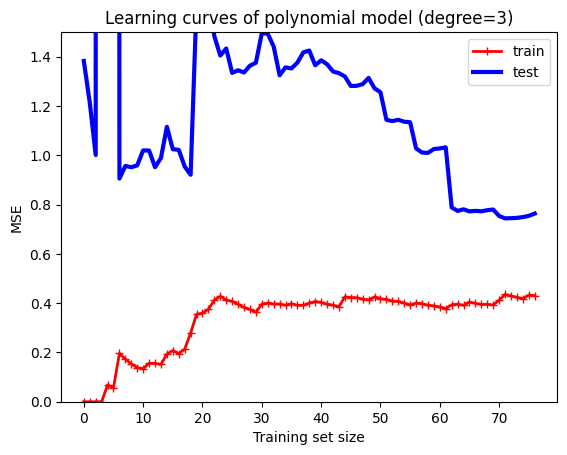

Test MSE mean :  3.56486464096928
Train MSE mean :  0.3342947695046966


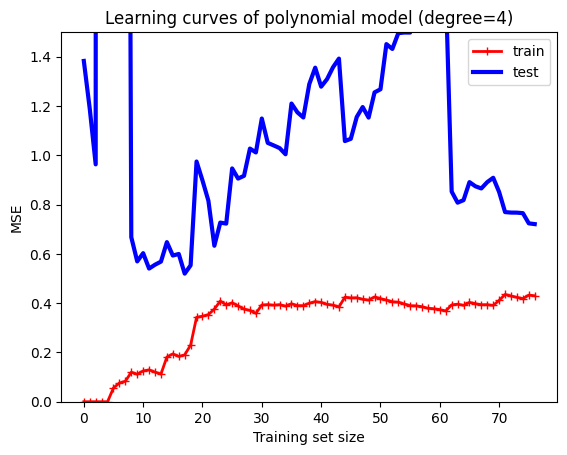

Test MSE mean :  478.34183916797434
Train MSE mean :  0.32356070836688006


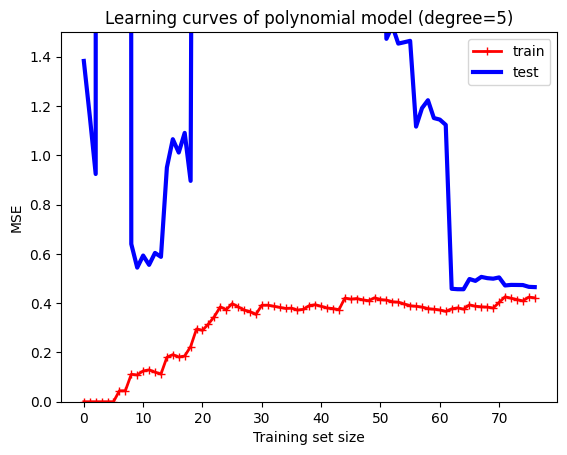

Test MSE mean :  2192.2495479206186
Train MSE mean :  0.31397044092065235


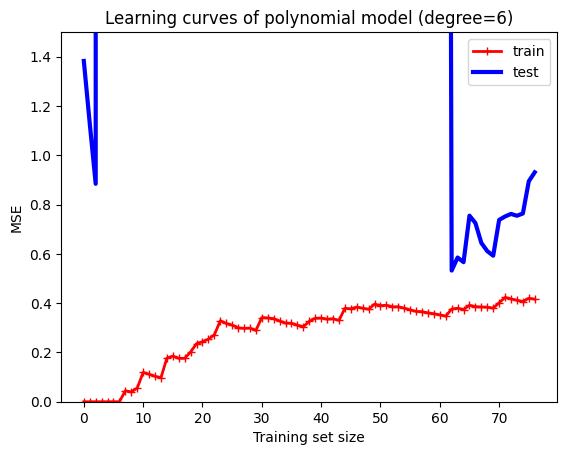

Test MSE mean :  3562.915756276098
Train MSE mean :  0.2849265456820857


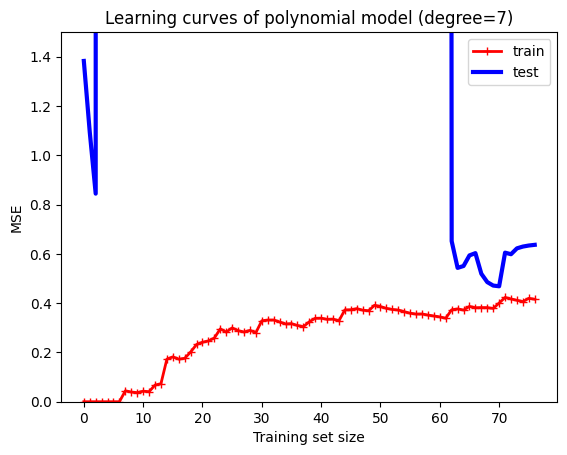

Test MSE mean :  4525.368608452162
Train MSE mean :  0.27701436251654116


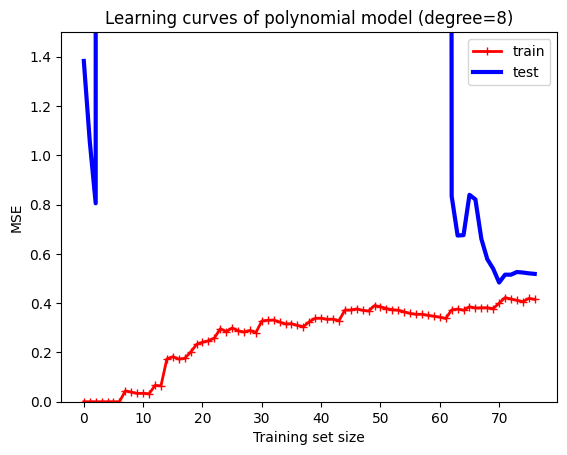

Test MSE mean :  5721.153223316727
Train MSE mean :  0.2762418467527261


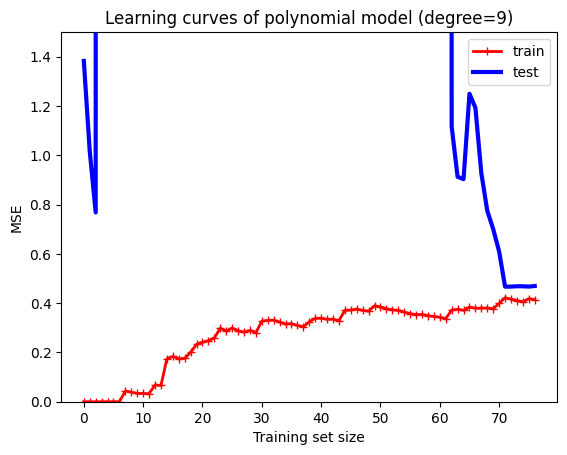

Test MSE mean :  7243.2363794908115
Train MSE mean :  0.27599238675029447


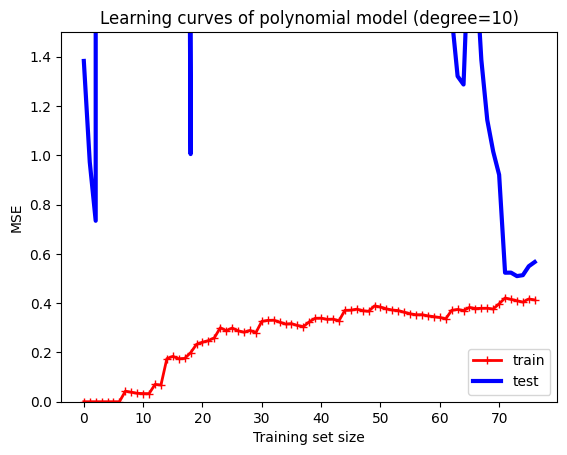

Test MSE mean :  9185.735315822287
Train MSE mean :  0.2757218435068948


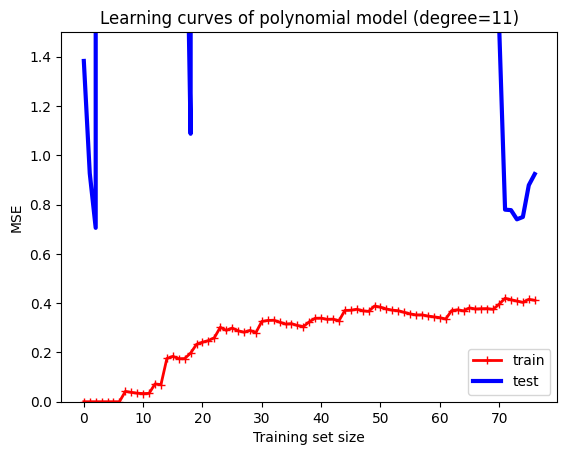

Test MSE mean :  11671.08713378438
Train MSE mean :  0.2753961567835822


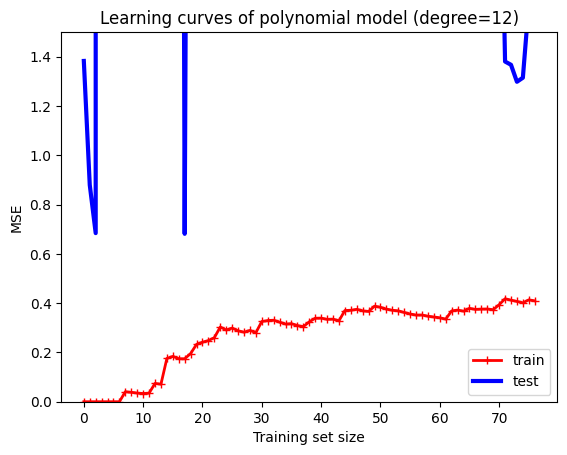

Test MSE mean :  14849.362822831476
Train MSE mean :  0.2750209848704929


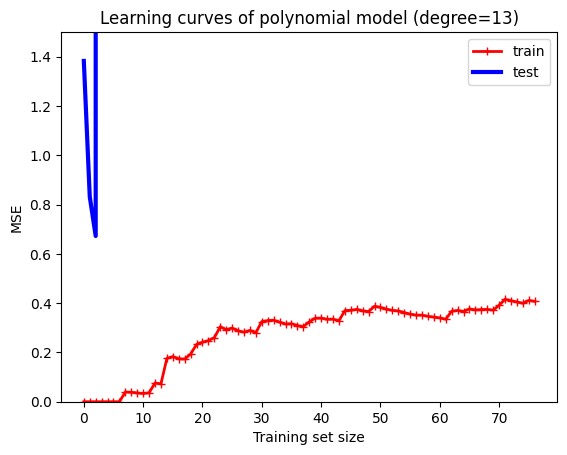

Test MSE mean :  18922.57399983044
Train MSE mean :  0.2745788669548842


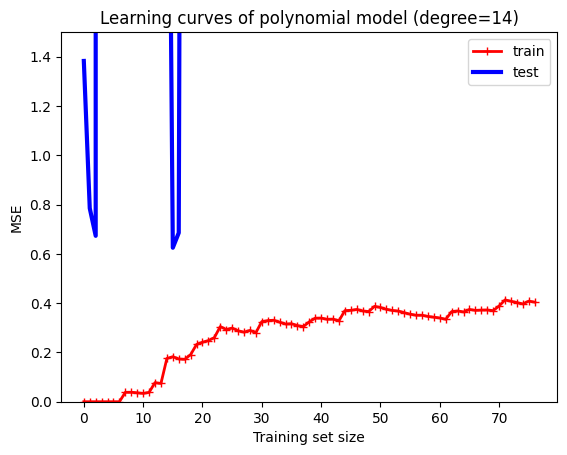

Test MSE mean :  24153.32363273389
Train MSE mean :  0.2740663432896303


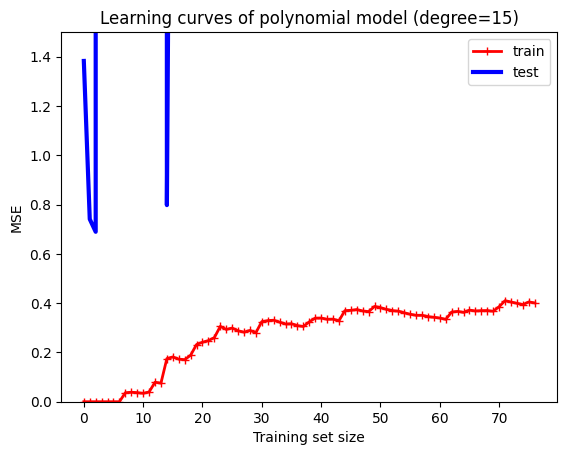

Test MSE mean :  30872.105022432046
Train MSE mean :  0.2734901243509319


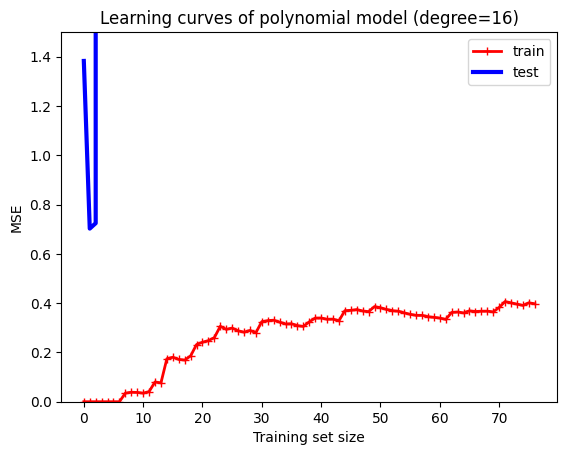

Test MSE mean :  39503.24651208172
Train MSE mean :  0.27285868636617966


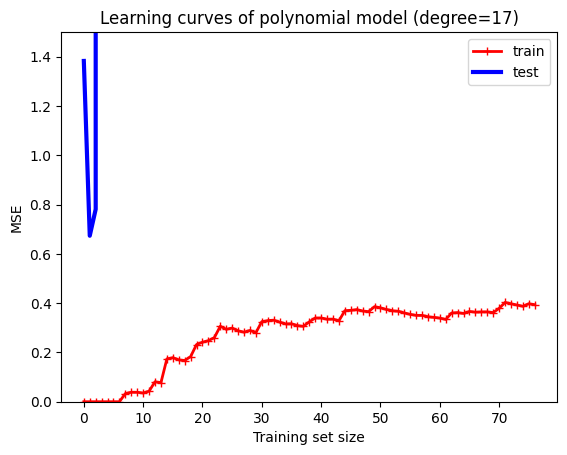

Test MSE mean :  50581.89418522124
Train MSE mean :  0.27218591470456993


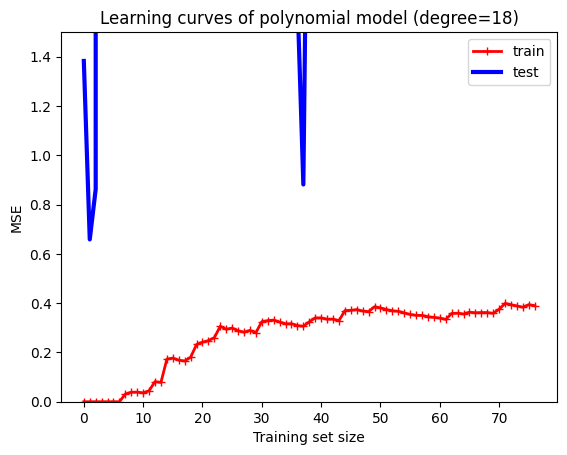

Test MSE mean :  64778.0004448715
Train MSE mean :  0.27148973293272155


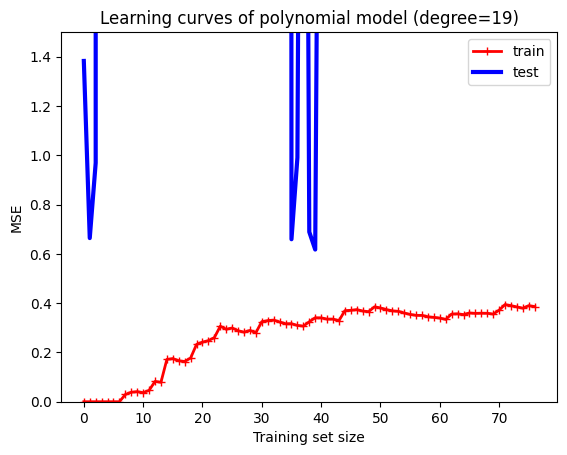

Test MSE mean :  82878.25342262781
Train MSE mean :  0.27081298880063137


In [22]:
# Solution 2
# Meilleur model est le polynome de 9e degré mais seulement si on a assez de valeur dans le set d'entraînement (>70)
for i in range(1,20,1):
    plot_learning_curves(i, X, y)


**3.5 Regularized linear models**

As shown with decision trees, a good way to reduce overfitting is to constrain the model: the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For polynomial models, the degrees of freedom can be limited by reducing the degree. This process is also called "regularization".

For a linear model, regularization can also be achieved by constraining the weights of the model. In the following we will look at three different regularization techiques that constrain the model weights: Ridge, Lasso and Elastic Net.

Before applying these regularization techniques it is generally recommended to normalize the data, otherwise some features would be unfairly penalized based on the scale of their values.

In [16]:
# Apply min/max normalization to X_train and X_test 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling parameters to X_test
X_test_scaled = scaler.transform(X_test)

**Ridge regression** (L2 regulatization)
* Cost: mse + aplha * the sum of the squared model weights
* Tends to shrink the coefficients towards zero but does not set any of them exactly to zero.
* Useful when there are many features, all of which contribute to the prediction.

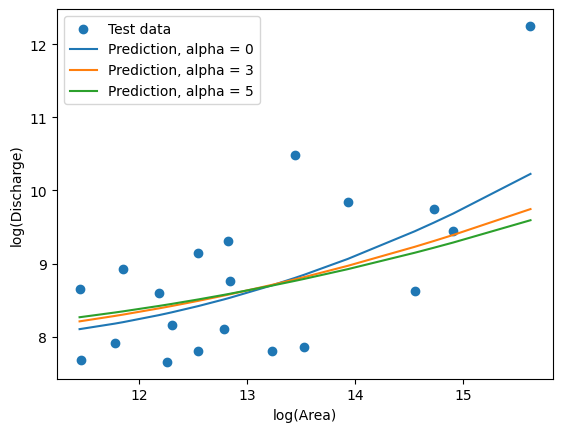

In [17]:
# Apply ridge regression to polynomial regression of degree 20 with different alpha value equal to 1 and plot regression line
from sklearn.linear_model import Ridge

# Initialize polynomial features object
poly = PolynomialFeatures(degree=2)

# Transform X_train and X_test
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

fig, ax = plt.subplots()

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(X_test, y_test, label='Test data')

def plot_ridge_regression(alpha):
    # Fit linear model on the polynomial features
    model_poly = Ridge(alpha=alpha, solver="cholesky")
    model_poly.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = model_poly.predict(X_test_poly)

    # Sort X_test and y_pred by X_test
    idx = np.argsort(X_test.values.flatten())
    X_test_sorted = X_test.values[idx]
    y_pred_poly_sorted = y_pred_poly[idx]

    plt.plot(X_test_sorted, y_pred_poly_sorted, label='Prediction, alpha = {}'.format(alpha))
  

plot_ridge_regression(0)
plot_ridge_regression(3)
plot_ridge_regression(5)

plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.legend()
plt.show()

**Lasso regression** (L1 regulatization)
* Cost: a mix of the cost functions of Ridge and Lasso
* Tends to shrink some coefficients exactly to zero, effectively performing feature selection
* Useful when there are many features but only a few are expected to contribute to the response variable.

c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+01, tolerance: 5.195e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

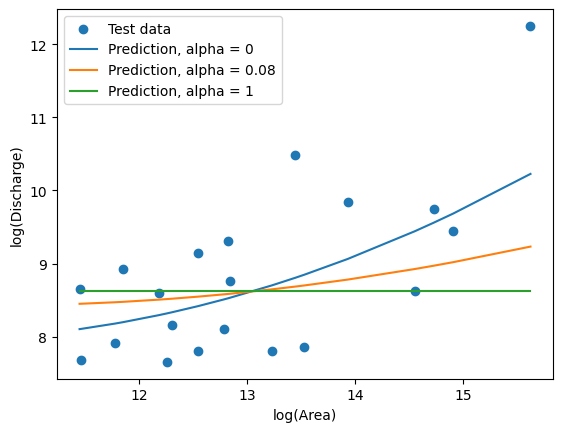

In [18]:
# Apply Lasso regression to polynomial regression of degree 20 with different alpha value equal to 1 and plot regression line
from sklearn.linear_model import Lasso

# Initialize polynomial features object
poly = PolynomialFeatures(degree=2)

# Transform X_train and X_test
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

fig, ax = plt.subplots()

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(X_test, y_test, label='Test data')

def plot_lasso_regression(alpha):
    # Fit linear model on the polynomial features
    model_poly = Lasso(alpha=alpha)
    model_poly.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = model_poly.predict(X_test_poly)

    # Sort X_test and y_pred by X_test
    idx = np.argsort(X_test.values.flatten())
    X_test_sorted = X_test.values[idx]
    y_pred_poly_sorted = y_pred_poly[idx]

    plt.plot(X_test_sorted, y_pred_poly_sorted, label='Prediction, alpha = {}'.format(alpha))

plot_lasso_regression(0)
plot_lasso_regression(0.08)
plot_lasso_regression(1)

plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.legend()
plt.show()

**Elastic Net regression**
* Cost: mix of cost functions from Ridge and Lasso
* Can perform feature selection like Lasso while still retaining Ridge's benefits of coefficient shrinkage

c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+01, tolerance: 5.195e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

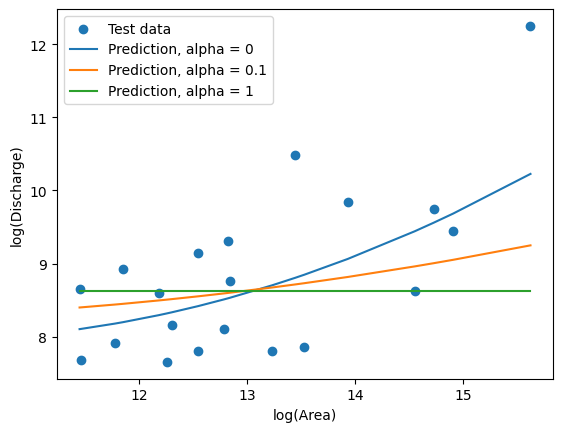

In [19]:
# Apply ElasticNet regression to polynomial regression of degree 20 with different alpha value equal to 1 and plot regression line
from sklearn.linear_model import ElasticNet

# Initialize polynomial features object
poly = PolynomialFeatures(degree=2)

# Transform X_train and X_test
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

fig, ax = plt.subplots()

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(X_test, y_test, label='Test data')

def plot_elasticnet_regression(alpha):
    # Fit linear model on the polynomial features
    model_poly = ElasticNet(alpha=alpha, l1_ratio=0.5)
    model_poly.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = model_poly.predict(X_test_poly)

    # Sort X_test and y_pred by X_test
    idx = np.argsort(X_test.values.flatten())
    X_test_sorted = X_test.values[idx]
    y_pred_poly_sorted = y_pred_poly[idx]

    plt.plot(X_test_sorted, y_pred_poly_sorted, label='Prediction, alpha = {}'.format(alpha))

plot_elasticnet_regression(0)
plot_elasticnet_regression(0.1)
plot_elasticnet_regression(1)

plt.xlabel('log(Area)')
plt.ylabel('log(Discharge)')
plt.legend()
plt.show()


**Exercise 3**

Can the polynomial regression of degree 20 outperform the best model found in Exercise 2 with the help of regularization?

c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+01, tolerance: 5.195e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

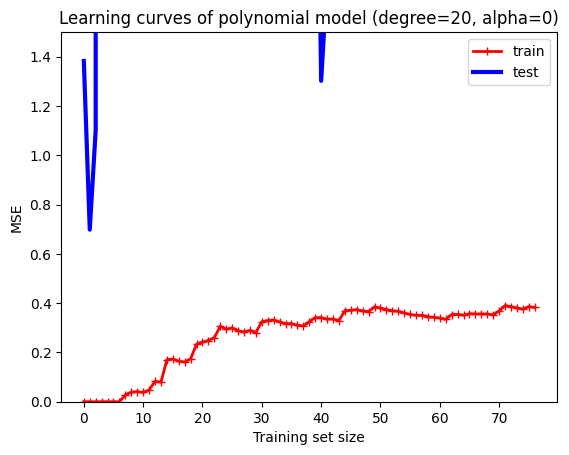

Test MSE mean :  105957.76345657883
Train MSE mean :  0.27012763719772054


c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.671e+01, tolerance: 5.195e-03
  model = cd_fast.enet_coordinate_descent(


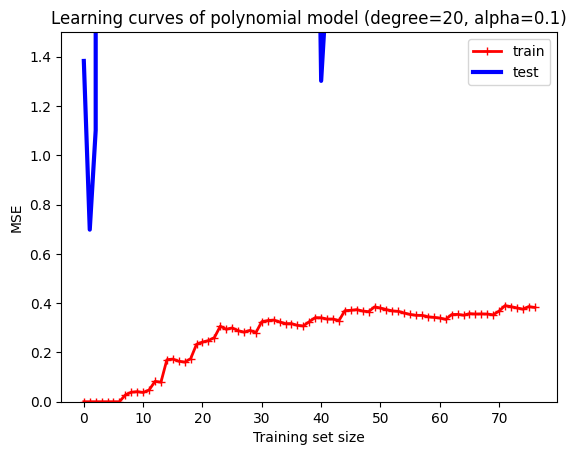

Test MSE mean :  105957.76345657883
Train MSE mean :  0.27012763719772054


c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+01, tolerance: 5.195e-03
  model = cd_fast.enet_coordinate_descent(


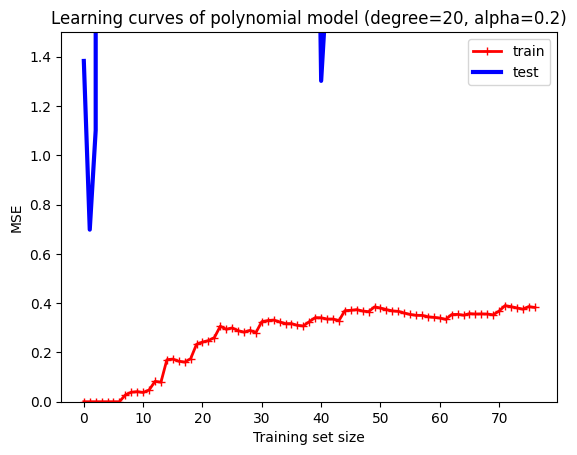

Test MSE mean :  105957.76345657883
Train MSE mean :  0.27012763719772054


c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+01, tolerance: 5.195e-03
  model = cd_fast.enet_coordinate_descent(


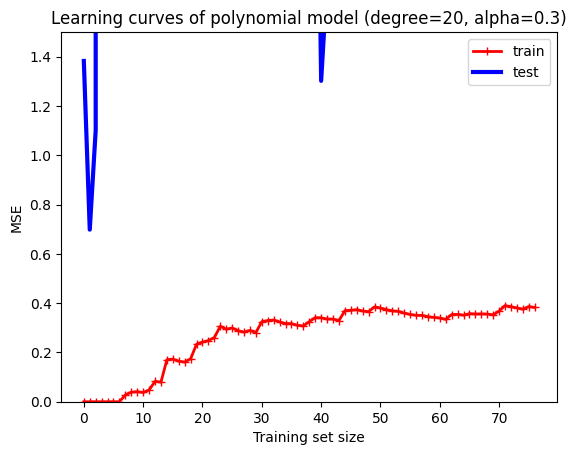

Test MSE mean :  105957.76345657883
Train MSE mean :  0.27012763719772054


c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+01, tolerance: 5.195e-03
  model = cd_fast.enet_coordinate_descent(


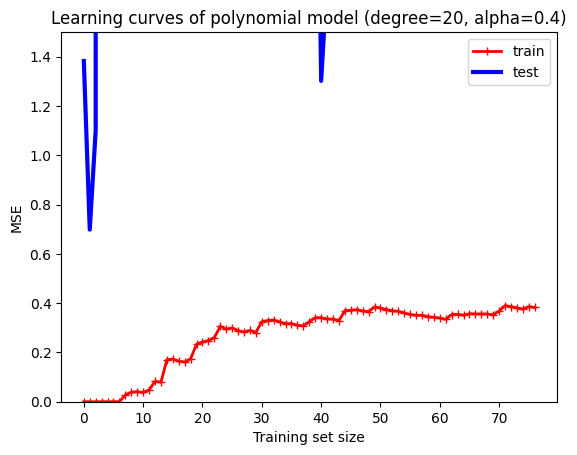

Test MSE mean :  105957.76345657883
Train MSE mean :  0.27012763719772054


c:\Users\ducvi02\AppData\Local\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+01, tolerance: 5.195e-03
  model = cd_fast.enet_coordinate_descent(


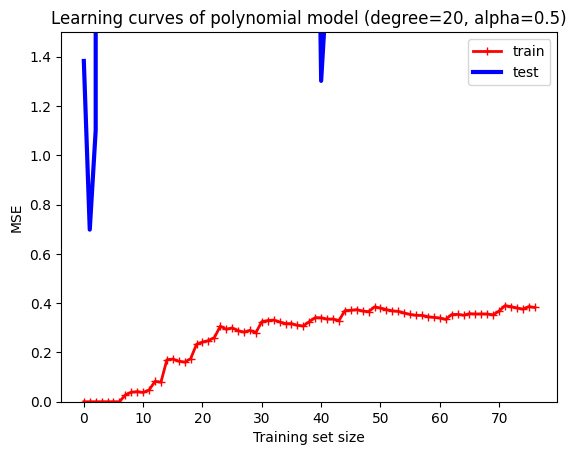

Test MSE mean :  105957.76345657883
Train MSE mean :  0.27012763719772054


In [36]:
# Solution 3

def plot_learning_curves_reg(degree, X, y, alpha):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    model_poly = Lasso(alpha=alpha)
    model_poly.fit(X_train_poly, y_train)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train_poly)):
        model.fit(X_train_poly[:m], y_train[:m])
        y_train_predict = model.predict(X_train_poly[:m])
        y_test_predict = model.predict(X_test_poly)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=3, label="test")
    plt.ylim(0,1.5)
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('MSE')
    plt.title(f'Learning curves of polynomial model (degree={degree}, alpha={alpha})')
    plt.show()
    print('Test MSE mean : ',np.mean(test_errors))
    print('Train MSE mean : ',np.mean(train_errors))


for i in [0,0.1,0.2,0.3,0.4,0.5]:

    plot_learning_curves_reg(20, X, y, i)


**3.6 Multivariate linear regression**

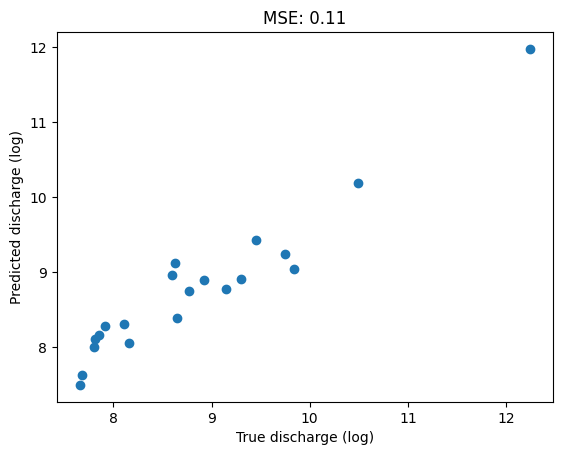

In [43]:
# Apply linear model to predict discharge from all the other features

# Define target variable y
y = df['Discharge']
y = np.log(y)

# Select input features X (all except Discharge)
X = df.drop(['Discharge', 'Name', 'Continent'], axis=1)

# Apply log transformation to Area only
X['Area'] = np.log(X['Area'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply min/max normalization to X_train and X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True discharge (log)')
plt.ylabel('Predicted discharge (log)')
# Add mse score in title
plt.title(f'MSE: {mse:.2f}')
plt.show()


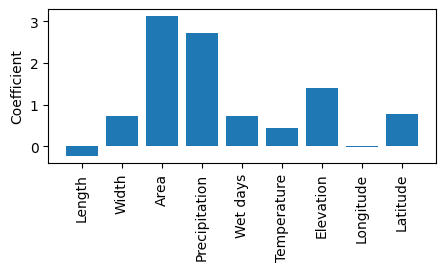

In [38]:
# Print bar chart with value of coefficients
fig, ax = plt.subplots(figsize=(5,2))
plt.bar(X.columns, lin_reg.coef_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.show()

**Exercise 4**

Apply the regularization techniques shown above. How do the trained coefficients of the linear model change? Can you use regularization to effectively discard some features?

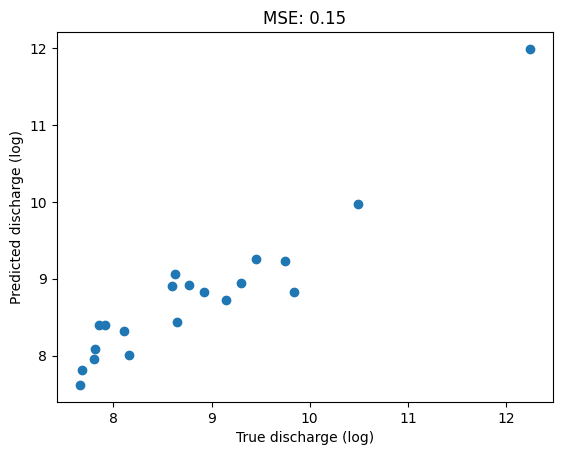

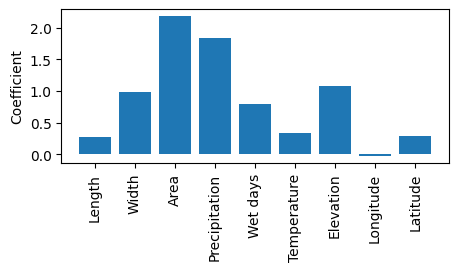

In [66]:
# Solution 4

# Apply linear model to predict discharge from all the other features

# Define target variable y
y = df['Discharge']
y = np.log(y)

# Select input features X (all except Discharge)
X = df.drop(['Discharge', 'Name', 'Continent'], axis=1)

# Apply log transformation to Area only
X['Area'] = np.log(X['Area'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply min/max normalization to X_train and X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
lin_reg = Ridge(alpha=0.3)

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True discharge (log)')
plt.ylabel('Predicted discharge (log)')
# Add mse score in title
plt.title(f'MSE: {mse:.2f}')
plt.show()

# Print bar chart with value of coefficients
fig, ax = plt.subplots(figsize=(5,2))
plt.bar(X.columns, lin_reg.coef_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.show()

#Avec la régularisation Ridge, on performe presque pareille à alpha = 0.3 mais ça semble indiquer que les données de longitude de laitude de longueur et de temperature ne sont pas les plus corrélés

**3.7 Random forest regressor** (optional)

Random Forest constructs multiple decision trees using different subsets of the training data, both in terms of instances and features. The final prediction is then obtained by aggregating the predictions from the individual trees, typically by computing the average

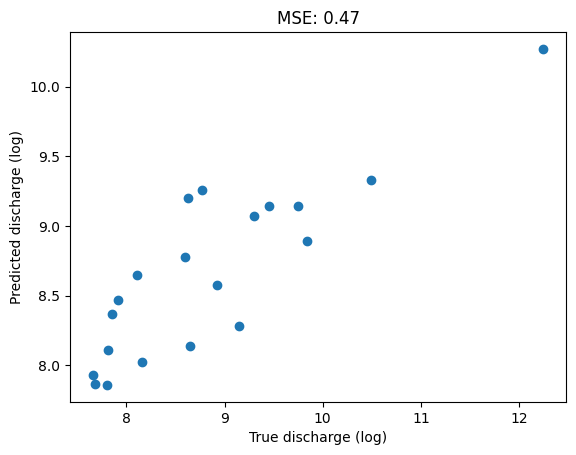

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Define target variable y
y = df['Discharge']
y = np.log(y)

# Select input features X (all except Discharge)
X = df.drop(['Discharge', 'Name', 'Continent'], axis=1)

# Apply log transformation to Area only
X['Area'] = np.log(X['Area'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_reg.predict(X_test)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True discharge (log)')
plt.ylabel('Predicted discharge (log)')
# Add mse score in title
plt.title(f'MSE: {mse:.2f}')
plt.show()

**Exercise 5** (optional)

Can you improve the performance of the random forest regressor by fine-tuning its hyperparameters?
* n_estimators: The number of trees in the forest.
* max_depth: The maximum depth of each tree.
* min_samples_split: The minimum number of samples required to split an internal node.
* min_samples_leaf: The minimum number of samples required to be at a leaf node.


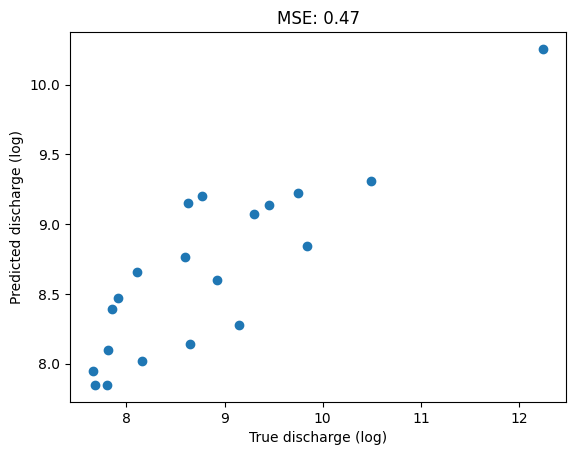

In [83]:
# Solution 5
# je n'ai pas été capable d'améliorer la performance.
from sklearn.ensemble import RandomForestRegressor

# Define target variable y
y = df['Discharge']
y = np.log(y)

# Select input features X (all except Discharge)
X = df.drop(['Discharge', 'Name', 'Continent'], axis=1)

# Apply log transformation to Area only
X['Area'] = np.log(X['Area'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_reg.predict(X_test)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Plot scatter of regression line, x_test vs y_test and y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True discharge (log)')
plt.ylabel('Predicted discharge (log)')
# Add mse score in title
plt.title(f'MSE: {mse:.2f}')
plt.show()